<a href="https://colab.research.google.com/github/staka99/PPPO/blob/main/IT_57_2018_Marko_Staka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Projektni zadatak iz predmeta Principi prezentacije i prepoznavanje oblika**





**Student: Marko Štaka, IT 57/2018**

# **Detekcija lica**

---

Detekcija lica se može posmatrati kao zasebna oblast mašinskog učenja. Koristi se za detekciju (odnosno prepoznavanje) ljudi, analizu emociju, procjenu starosti i drugih elemenata. Najčešći slučajevi primjene ovih metoda su sigurnosni detektori lica koji se najčešće koriste za otključavanje mobilnih telefona. Primjeri korišćenja ovakvih metoda su i filteri na kamerama društvenih mreža. 

Detektori ključnih tačaka lica uglavnom pokušavaju da detektuju sledeće dijelove lica:


*   usta
*   desna obrva
*   lijeva obrva
*   desno oko
*   lijevo oko
*   vilica




Metode koje rješavaju problem detekcije lica podijeljene su na dvije osnovne grupe na osnovu načina rada algoritama:


1.   **Klasični pristup** predstavlja kategoriju modela za prepoznavanje lica koji koriste algoritme za prepoznavanje određenih karakteristika na fotografijama. Poređenjem karakteristika na većem broju primjera, formira se model koji donosi predikciju da li se na fotografiji nalazi lice i u slučaju da je rezultat pozitivan vraća nam poziciju lica na slici. Haar-cascade i HOG predstavljaju primjere modela klasičnog pristupa koji će biti testirani u nastavku ovog rada.
2.   **Moderni pristup** obuhvata metode dubokog učenja čija je popularnost značajno porasla u posljednjih nekoliko godina zbog velikog napretka u konvolucijskim neuronskim mrežama oko 2021. godine kao i sve veće pristupačnosti dobrih grafičkih kartica. Ovi pristupi nastoje ispraviti nedostatke i nadograditi klasične modele za detekciju lica. MTCNN je primjer modela koji pripada modernom pristupu koji će biti testiran u nastavku ovog rada.



Primjena detekcije lica može se uočiti svakodnevno u realnom svijetu. Većina mobilnih, pa i drugih pametnih uređaja svoje sigurnosne provjere zasniva na detekciji lica. Međutim, detekcija lica ima ozbiljniju primjenu u sigurnosnim provjerama u svakodnevnom životu u mnogim razvijenim državama. Primjer primjene takvih sigurnosni aktivnosti kod nas je projekat "Sigurni grad". Ministarstvo unutrašnjih poslova Republike Srbije je 2011. godine započelo razgovore sa kompanijom "Huawei Technologies Co, LTD" o mogućnosti uvođenja tehnologije prepoznavanja lica na teritoriji Republike Srbije. Potom je 17.12.2014 godine između MUP-a i Huawei-a zaključen Memorandum o razumijevanju koji se odnosi na saradnju i neophodne korake radi ostvarivanja projekta “Safe City”. Vlada je 19.5. 2017. godine zaključkom dala saglasnost Mup-u da zaključi ugovor o implementaciji kapitalnog projekta "Video nadzor u saobraćaju-faza 1" sa Huawei-om. Iste godine je urađena rekonstrukcija komandno-operativnog centra PU Beograd gdje je smešten data centar. (izvor: *Procena uticaja obrade na zaštitu podataka o ličnosti korišćenjem sistema video nadzora. Beograd: Ministarstvo unutrašnjih poslova. 2019. str. 20.*) Kao razlog uvođenja tehnologije prepoznavanja lica navode se sve veće poteškoće kojom se službe bezbednosti sreću u svom radu. Ovi projekti istovremeno omogućavaju da životno okruženje bude sigurnije, ali i narušavaju privatnost građana.

## **Set podataka**

Set podataka dodijeljen je u okviru podjele projektnih zadataka iz predmeta Principi prezentacije i prepoznavanja oblika. U 5 direktorijuma nalaze se 274 fotografije poznatih glumaca. Fotografije su raspoređene po direktorijumima sa imenom i prezimenom glumca. Fotografije sledećih glumaca korišćene su u nastavku projekta:

1.   Chris Evans
2. Chris Hemsworth
3. Mark Ruffalo
4. Robert Downey Jr.
5. Scarlett Johansson

U narednim ćelijama, vrši se preuzimanje seta podataka sa dodijeljenog linka, kao i unzip-ovanje preuzetih podataka.

In [64]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw" -O images.zip && rm -rf /tmp/cookies.txt
     

--2022-12-14 01:45:16--  https://docs.google.com/uc?export=download&confirm=t&id=1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw
Resolving docs.google.com (docs.google.com)... 108.177.96.139, 108.177.96.101, 108.177.96.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1ij9fg27c0000k7otfqivq5bhvc8qbf7/1670982300000/06049624160957438625/*/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw?e=download&uuid=1f29077e-8aa6-4c6f-8e3d-e37bbec4f5dc [following]
--2022-12-14 01:45:16--  https://doc-14-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1ij9fg27c0000k7otfqivq5bhvc8qbf7/1670982300000/06049624160957438625/*/1sk0Uuycy_l9_SRmcWMIijhTwOAP-usnw?e=download&uuid=1f29077e-8aa6-4c6f-8e3d-e37bbec4f5dc
Resolving doc-14-64-docs.googleusercontent.com (doc-14-64-docs.googleusercontent.com)... 108.177.127.132,

In [65]:
!unzip images.zip

Archive:  images.zip
replace cropped_images/chris_evans/chris_evans1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: cropped_images/chris_evans/chris_evans1.png  
  inflating: cropped_images/chris_evans/chris_evans10.png  
  inflating: cropped_images/chris_evans/chris_evans11.png  
  inflating: cropped_images/chris_evans/chris_evans12.png  
  inflating: cropped_images/chris_evans/chris_evans13.png  
  inflating: cropped_images/chris_evans/chris_evans14.png  
  inflating: cropped_images/chris_evans/chris_evans15.png  
  inflating: cropped_images/chris_evans/chris_evans16.png  
  inflating: cropped_images/chris_evans/chris_evans17.png  
  inflating: cropped_images/chris_evans/chris_evans18.png  
  inflating: cropped_images/chris_evans/chris_evans19.png  
  inflating: cropped_images/chris_evans/chris_evans2.png  
  inflating: cropped_images/chris_evans/chris_evans20.png  
  inflating: cropped_images/chris_evans/chris_evans21.png  
  inflating: cropped_images/chris_evans/chris_ev

## **Detekcija lica pomoću OpenCV Haar cascade klasifikatora**

**OpenCV** predstavlja skraćenicu za biblioteku programskih funkcija (engl. *Open Source Computer Vision*). Uključuje veliki broj alata, među kojima su sistemi za prepoznavanje lice, prepoznavanje pokreta, 2D i 3D alati, interakcija čovjeka i računara, identifikacija objekata i mnogi drugi.

**Haar-cascade** je model za detekciju licu zasnovan na radu takozvanih Haar karakteristika. Jedna karakteristika se sastoji od više susjednih regija na slici. Vrši se zbir inteziteta piksela jedne regije i vraća se razlika između zbira tih suma. Razlika suma predstavlja jednu Haar karakteristiku. Primjer jedne Haar karakteristike pri detekciji lica je informacija da su pikseli u području očiju uvijek tamniji od područja nosa, dok je područje očiju svjetlije od područja obrva. Prilikom izvršavanja modela, prikuplja se veliki broj karakteristika, od kojih većina često nije od interesa za izvršavanje zadataka, pa je cilj ovog modela odvojiti bitne od nebitnih karakteristika. 

In [66]:
# Preuzimanje potrebne biblioteke
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
import cv2
from google.colab.patches import cv2_imshow

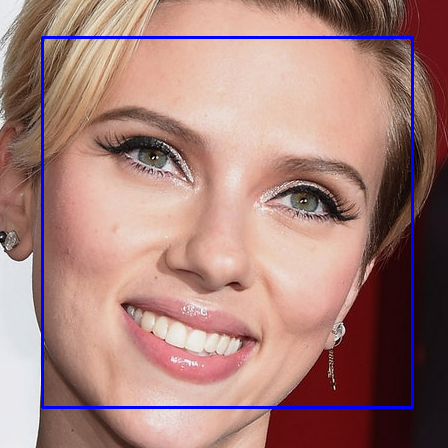

In [68]:
# Učitavanje haar cascade klasifikatora
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Preuzimanje fotografije iz dostupnog dataseta
img = cv2.imread("cropped_images/scarlett_johansson/scarlett_johansson6.png")

# Dalji rad se vrši na grayscale verziji fotografije
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detekcija lica na preuzetoj fotografiji
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

# Crtanje okvira oko prepoznatog lica
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

# Prikaz fotografije
cv2_imshow(img)

## **Detekcija lica pomoću MTCNN**

**MTCNN** predstavlja skraćenicu od engleskog naziva ovog modela - *Multi-Task Cascaded Convolutional Neural Networks*. U prevodu na srpski, naziv ovog modela bi bio višeprogramske kaskadne konvolucione neuronske mreže. Kako i sam naziv kaže, ovaj model se sastoji od 3 konvolucijske neuronske mreže. Rezultati svake mreže se modifikuju i predstavljaju ulaz naredne mreže. Taj proces se naziva stvaranje
piramide slika koji pomaže pri budućoj obradi okvira objekata. Tri mreže koje čine ovaj model su: 

*   **P-net** je skraćeni naziv za prvu mrežu MTCNN modela koja se naziva Predložna mreža(engl. *Proposal network*). Zadatak ove mreže je da odredi gdje na slici se nalaze objekti. Rezultat ove mreže je veliki broj okvira na slici koji pokazuju i na tačno i netačno identifikovane objekte. Svi okviri koji pokazuju na isti objekt se pronalaze i spajaju u jedan okvir pomoću NMS algoritma.
*   **R-net** mreža je druga mreža MTCNN modela i naziva se pročišćavajuća mreža (engl. *Refine network*). Ulaz ove mreže predstavljaju spojeni okviri koji su rezultat prve, P-net mreže. Zadatak druge mreže je dodatno filtriranje loših objekata i kalibracija okvira. Izlaz koji pruža ova mreža je manji broj okvira koji uglavnom pokazuju na većinski tačne identifikovane objekte. Kao i kod prve mreže, korišćenjem NMS algoritma svi okviri koji pokazuju na isti objekt se
spajaju.

*   **O-net** (eng. *Output network*) je izlazna mreža i posljednja, odnosno treća mreža modela. Funkcionalnost joj je ista kao i kod druge mreže, s tim što izlaz predstavlja 5 ključnih tačaka lica identifikovanih na fotografiji (oči, vrh nosa, lijevi i desni kraj usta). Identifikovane tačke biće prikazane na narednom primjeru.



Ovaj model postiže odlične rezultate detekcije objekata u stvarnom vremenu. Na narednom primjeru, prikazano je korišćenje ovog modela prilikom detekcije lica na fotografijama. Važno je napomenuti da se osim lica, model može koristiti i za detekciju drugih objekata.

In [69]:
# Instaliranje odgovarajuće biblioteke
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
# Preuzimanje potrebnih modela
import mtcnn
from mtcnn.mtcnn import MTCNN
import matplotlib.pyplot as plt

In [71]:
# Definisanje funkcije za detekciju lica kojoj se prosleđuje fotografija
def detect_face(image):
    detector = MTCNN()
    bounding_boxes = detector.detect_faces(image)
    return bounding_boxes

In [72]:
# Definisanje funkcije za crtanje pravougaonika oko detektovanog lica
def draw_bounding_boxes(image, bboxes):
    for box in bboxes:
        x1, y1, w, h = box['box']
        cv2.rectangle(image, (x1, y1), (x1+w,y1+h), (0,0,255), 2)

In [73]:
# Definisanje funkcije za crtanje detektovanih tačaka na lici
def mark_key_point(image, keypoint):
    cv2.circle(image, (keypoint), 2, (0,0,255), 2)

In [74]:
# Definisanje fotografije koja će se koristiti za provjeru rada modela
image = cv2.cvtColor(cv2.imread("cropped_images/chris_hemsworth/chris_hemsworth47.png"), cv2.COLOR_BGR2RGB)

# Provjera rada prve (detect_face) funkcije
bboxes = detect_face(image)
print("Koordinate detektovanih tačaka: \n",bboxes)

# Dobijeni odgovor predstavljaju koordinate dobijenih tačaka
# - identifikovani pravougaonik i pet tačaka

1/1 [==============================] - 0s 166ms/step


1/1 [==============================] - 0s 102ms/step
Koordinate detektovanih tačaka: 
 [{'box': [40, 0, 290, 381], 'confidence': 0.9997739195823669, 'keypoints': {'left_eye': (132, 149), 'right_eye': (264, 154), 'nose': (203, 227), 'mouth_left': (133, 292), 'mouth_right': (256, 292)}}]


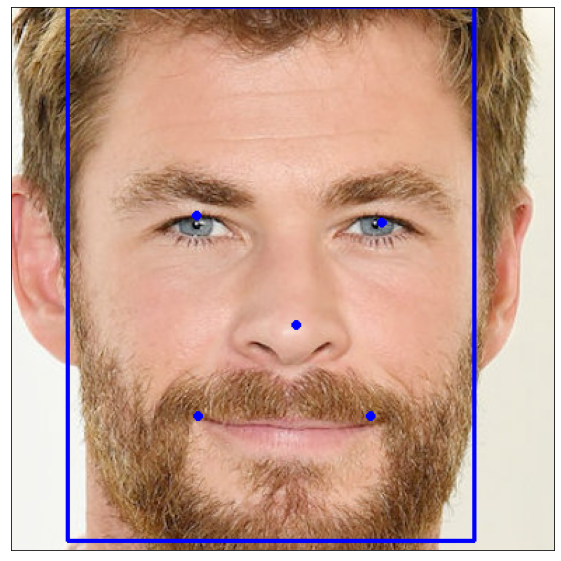

In [75]:
# Crtanje pravougaonika na detektovanom licu fotografije pomoću ranije definisane funkcije
draw_bounding_boxes(image, bboxes)

# Crtanje pet detektovanih tačaka (lijevo oko, desno oko, nos, lijevi ugao usana, desni ugao usana)
mark_key_point(image, bboxes[0]['keypoints']['left_eye'])
mark_key_point(image, bboxes[0]['keypoints']['right_eye'])
mark_key_point(image, bboxes[0]['keypoints']['nose'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_left'])
mark_key_point(image, bboxes[0]['keypoints']['mouth_right'])

# Prikaz fotografije sa rezultatima
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

## **Detekcija lica pomoću HOG, 68 ključnih tačaka lica**

In [76]:
# Preuzimanje potrebnih biblioteka
import dlib
from imutils import face_utils

**Dlib** je javno dostupna biblioteka koja ima veoma široku upotrebu u svim sferama računarstva. Biblioteka je napisana u programskom jeziku C++. Predstavlja zbirku nezavisnih softverskih komponenti, svaka dolazi uz dokumentaciju i temeljnu podršku za oktlanjanje grešaka. Dlib za detekciju lica koristi **histogram orjentisanih gradijenata (HOG)**, piramidu slika kao i pokretni prozor za detekciju. Ovaj detektor je prilično sveobuhvatan, sa veoma velikom uspješnošću u detektovanju lica sa slike.

**HOG** spada u modele klasičnog pristupa rješavanja problema detekcije lica na fotografijama. Temelji se na sakupljanju informacija oko pojedinih piksela i donosi zaključke na temelju sličnosti među primjerima.


Alati iz ove biblioteke nam omogućavaju:


1.   Lokalizaciju lica na slici – pronalaženje pozicije lica i selekcija regiona od interesa
2.   Pronalaženje kjučnik tačaka lica


Da bismo vršili detekciju 68 ključnih tačaka na licu, potrebno je da uvezemo odgovarajuće fajlove. Ovi fajlovi su istrenirani modeli koje ćemo u nastavku koristiti.


In [77]:
# Preuzimanje fajlova neophodnih za detekciju
!wget   http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 /content/shape_predictor_68_face_landmarks.dat.bz2
datFile =  "/content/shape_predictor_68_face_landmarks.dat"

--2022-12-14 01:46:05--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2.1’

shape_predictor_68_ 100%[===================>]  61.07M  16.6MB/s    in 5.3s    

2022-12-14 01:46:10 (11.6 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2.1’ saved [64040097/64040097]

bunzip2: Output file /content/shape_predictor_68_face_landmarks.dat already exists.


U nastavku zadatka definišu se detektor i prediktor. Uloga detektora je da prepozna prostor u kojem se lice nalazi, dok je uloga prediktora da prikaže ključne tačke lica. Detektor korišćen u ovom zadatku omogućava frontal detekciju lica, odnosno, to su slučajevi kada lice gleda direktno u kameru.

In [78]:
# Inicijalizacija dlib detektora (HOG)
detector = dlib.get_frontal_face_detector()
# Učitavanje pretreniranog modela za prepoznavanje karakterističnih tačaka
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

In [79]:
# Uzimanje tri slike koje će se u nastavku koristiti
img_1 = cv2.cvtColor(cv2.imread("cropped_images/scarlett_johansson/scarlett_johansson6.png"), cv2.COLOR_BGR2RGB)
img_2 = cv2.cvtColor(cv2.imread("cropped_images/scarlett_johansson/scarlett_johansson33.png"), cv2.COLOR_BGR2RGB)
img_3 = cv2.cvtColor(cv2.imread("cropped_images/scarlett_johansson/scarlett_johansson37.png"), cv2.COLOR_BGR2RGB)

# U nastavku zadatka biće potrebne grayscale slike
gray_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
gray_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)

# Smještanje svih slika u niz koji se koristi u prikazu
images_array = [img_1, img_2, img_3]
grays = [gray_1, gray_2, gray_3]

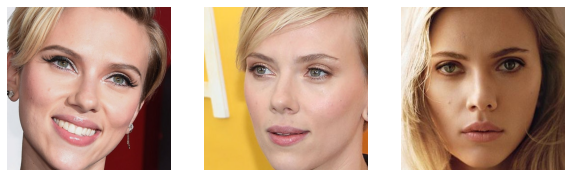

In [80]:
# Prikaz fotografija na kojima će biti izvršen model 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
for index,image in enumerate(images_array):
  ax[index].imshow(images_array[index])
  ax[index].axis('off')
plt.show()

In [81]:
# Prolazak kroz sve preuzete fotografije
for index,image in enumerate(images_array):

    # Detekcija svih lica na grayscale slikama
    rects = detector (grays[index], 1)
    # 1 koristimo jer nije potrebno uvećanje slike i preciznija detekcija
    
    # Iteracija kroz sve detekcije
    for (i, rect) in enumerate(rects):
      # Određivanje ključnih tačaka
      # Shape predstavlja 68 koordinata
      shape = predictor(grays[index], rect)
      shape = face_utils.shape_to_np(shape)
      print("Dimenzije prediktor matrice: {0}".format(shape.shape)) # 68 tačaka (x,y)
      print("Prva 3 elementa matrice")
      print(shape[:3])

      # Konvertovanje pravougaonika u boundig box koordinate
      (x,y,w,h) = face_utils.rect_to_bb(rect)
      # Crtanje prevougaonika oko detektovanog lica
      cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2)

      # Ispis rednog broja detektovanog lica 
      cv2.putText(image, "Lice #{}".format(i+1), (x-10, y-10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

      # Crtanje 68 ključnih tačaka
      for(x,y) in shape:
        cv2.circle(image, (x,y), 4, (0,0,255), -4)

Dimenzije prediktor matrice: (68, 2)
Prva 3 elementa matrice
[[ 42 139]
 [ 37 185]
 [ 33 231]]
Dimenzije prediktor matrice: (68, 2)
Prva 3 elementa matrice
[[ 80 137]
 [ 79 166]
 [ 82 195]]
Dimenzije prediktor matrice: (68, 2)
Prva 3 elementa matrice
[[ 48 140]
 [ 51 175]
 [ 58 208]]


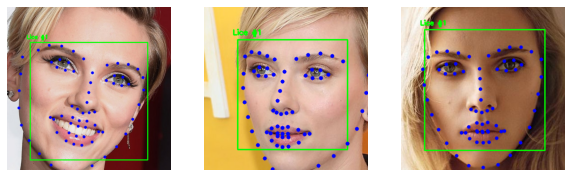

In [83]:
# Prikaz rezultata
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
for index,image in enumerate(images_array):
  ax[index].imshow(images_array[index])
  ax[index].axis('off')
plt.show()

Na prikazanim rezultatima se može uočiti rezultat detektora i prediktora. Zeleni kvadrat je prostor koji prepoznaje detektor. Plave tačke (njih 68) su detektori ključnih tačaka lica.

Tačke u okviru primjenjenog modela su uvijek fiksne. Raspored tih 68 tačaka prikazan je na narednoj skici. To znači da je, nezavisno od fotografije, udaljenost između tačaka 32 i 36 uvijek predstavlja širinu nosa. Bez obzira koju fotografiju postavimo (isključujući slučajeve kada nije moguće detektovati lice na fotografiji), lijeva i desna detektovana obrva imaće po 5 tačaka. Računanje udaljenosti ovih detektovanih tačaka je dobra osnova za određivanje starosti osobe. Međutim, ovo pitanje otvara problem perspektive - dužina nosa nije ista kada se osoba približi kameri, kada se udalji od kamere i kada se osoba fotografiše pod drugačijim uglom. Ovaj problem se djelimično može riješiti normalizacijom prikupljenih podataka.





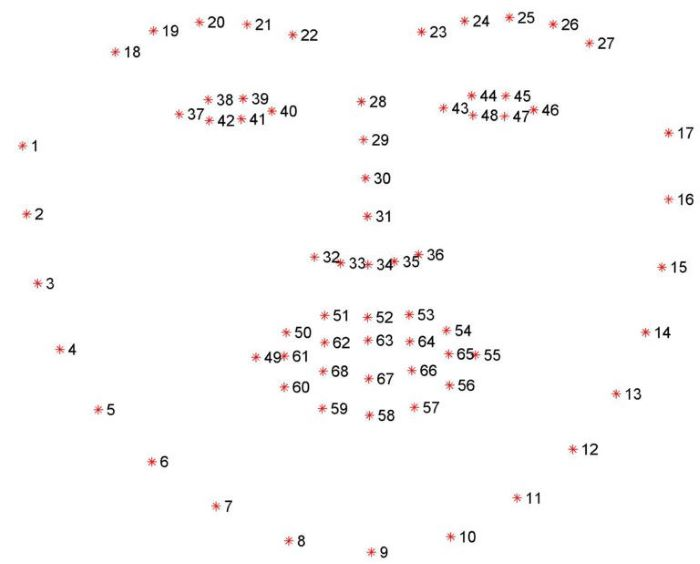

## **Prepoznavanje lica**

Prepoznavanje lica, odnosno osoba na identifikovanim licima fotografije predstavlja jednu od najjednostavnijih biblioteka za proces detekcije lica. Alati iz ove biblioteke su nastali kao napor za prevazilaženje nedostataka klasičnih i modernih pristupa pri detekciji lica. Alati iz ove biblioteke napravljeni su korišćenjem dlib-ovih najsavremenijih alata za prepoznavanje lica. Model ima tačnost od 99,38%. Pored odličnih performansi i velikog procenta tačnosti, izvršavanje ovakvih algoritama suočava se sa raznim izazovima u modernom vremenu. Ukoliko model ima odgovarajuće fotografije, sposoban je za identifikaciju lica i ukoliko je fotografija zabilježena pod drugačijim uglom. Međutim, problem sa prepoznavanjem lica može se desiti kada osoba nosi neki detalj, poput naočara, a taj detalj je izostavljen na fotografijama za učenje lica (primjeri ovakvih nedostataka biće prikazani u nastavku). Mnogi korisnici mobilnih uređaja naišli su na sličan problem usljed obaveznog nošenja maske tokom pandemije virusa korona. Tokom pandemije, neki proizvođači mobilnih uređaja su ažurirali sisteme u vidu dvostruke detekcije lica - detekcija lica bez i detekcija sa maskom.

In [84]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [85]:
import os
import shutil
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

In [86]:
# Kreiranje direktorijuma sa fotografijama za analizu, odnosno fotografije na kojima želimo da prepoznajemo osobe
analiza_dir = 'analiza'
if os.path.exists(analiza_dir):
  shutil.rmtree(analiza_dir)
  print('Folder je već postojao.')

!mkdir analiza
!wget https://media.glamour.com/photos/627fec3c7f9b9aefba2510d9/master/w_2560%2Cc_limit/452760796 -O analiza/1.jpg
!wget https://www.pinkvilla.com/files/styles/amp_metadata_content_image/public/scarlett_johansson_mark_ruffalo.jpg -O analiza/2.jpg
!wget https://pbs.twimg.com/media/DbW44XVVAAEUkJq.jpg -O analiza/3.jpg
print('Uspješno kreiran folder sa fotografijama za analizu.')

Folder je već postojao.
--2022-12-14 01:46:45--  https://media.glamour.com/photos/627fec3c7f9b9aefba2510d9/master/w_2560%2Cc_limit/452760796
Resolving media.glamour.com (media.glamour.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to media.glamour.com (media.glamour.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 545772 (533K) [image/jpeg]
Saving to: ‘analiza/1.jpg’

analiza/1.jpg       100%[===================>] 532.98K  --.-KB/s    in 0.01s   

2022-12-14 01:46:45 (40.8 MB/s) - ‘analiza/1.jpg’ saved [545772/545772]

--2022-12-14 01:46:45--  https://www.pinkvilla.com/files/styles/amp_metadata_content_image/public/scarlett_johansson_mark_ruffalo.jpg
Resolving www.pinkvilla.com (www.pinkvilla.com)... 65.9.86.119, 65.9.86.125, 65.9.86.5, ...
Connecting to www.pinkvilla.com (www.pinkvilla.com)|65.9.86.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95342 (93K) [image/jpeg]
Saving to: ‘analiz

In [87]:
# Definisanje metode za učitavanje fotografije
def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width*2, height*2))

In [88]:
# Učitavanje slike svakog od glumaca iz seta podataka
scarlett = face_recognition.load_image_file('cropped_images/scarlett_johansson/scarlett_johansson1.png')
chris_e = face_recognition.load_image_file('cropped_images/chris_evans/chris_evans1.png')
mark = face_recognition.load_image_file('cropped_images/mark_ruffalo/mark_ruffalo1.png')
robert = face_recognition.load_image_file('cropped_images/robert_downey_jr/robert_downey_jr1.png')
chris_h = face_recognition.load_image_file('cropped_images/chris_hemsworth/chris_hemsworth1.png')

# Prepoznavanje osobe uz pomoć face encoding-a
scarlett_face = face_recognition.face_encodings(scarlett) [0]
chris_e_face = face_recognition.face_encodings(chris_e) [0]
mark_face = face_recognition.face_encodings(mark) [0]
robert_face = face_recognition.face_encodings(robert) [0]
chris_h_face = face_recognition.face_encodings(chris_h) [0]

# Pravljenje niza poznatih lica i učenje njihovih imena
known_face_encodings = [
    scarlett_face,
    chris_e_face,
    mark_face,
    robert_face,
    chris_h_face
]
known_face_names = [
    "Scarlett Johansson",
    "Chris Evans", 
    "Mark Ruffalo", 
    "Robert Downey",
    "Chris Hemsworth"
]

Prepoznavanje na fotografiji:  3.jpg


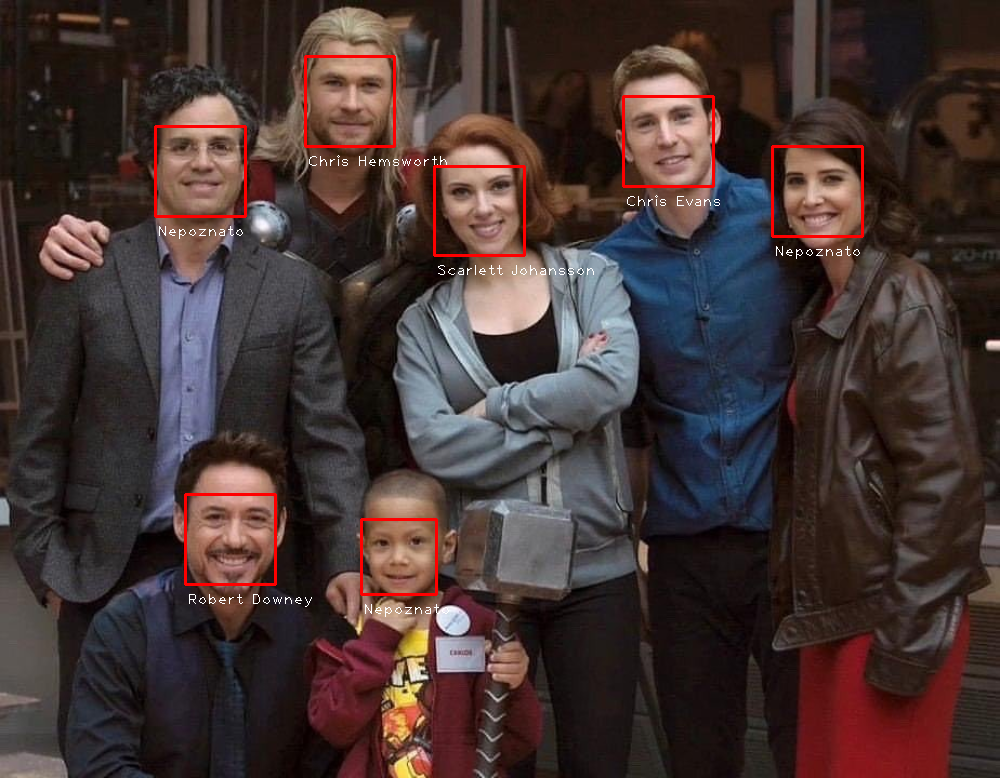

Prepoznavanje na fotografiji:  1.jpg


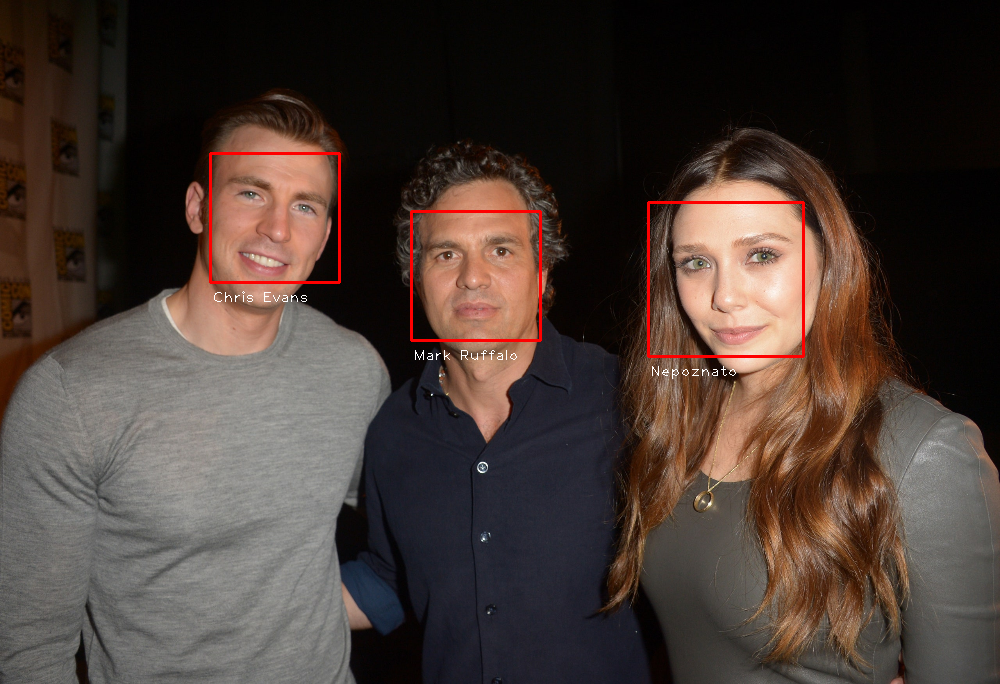

Prepoznavanje na fotografiji:  2.jpg


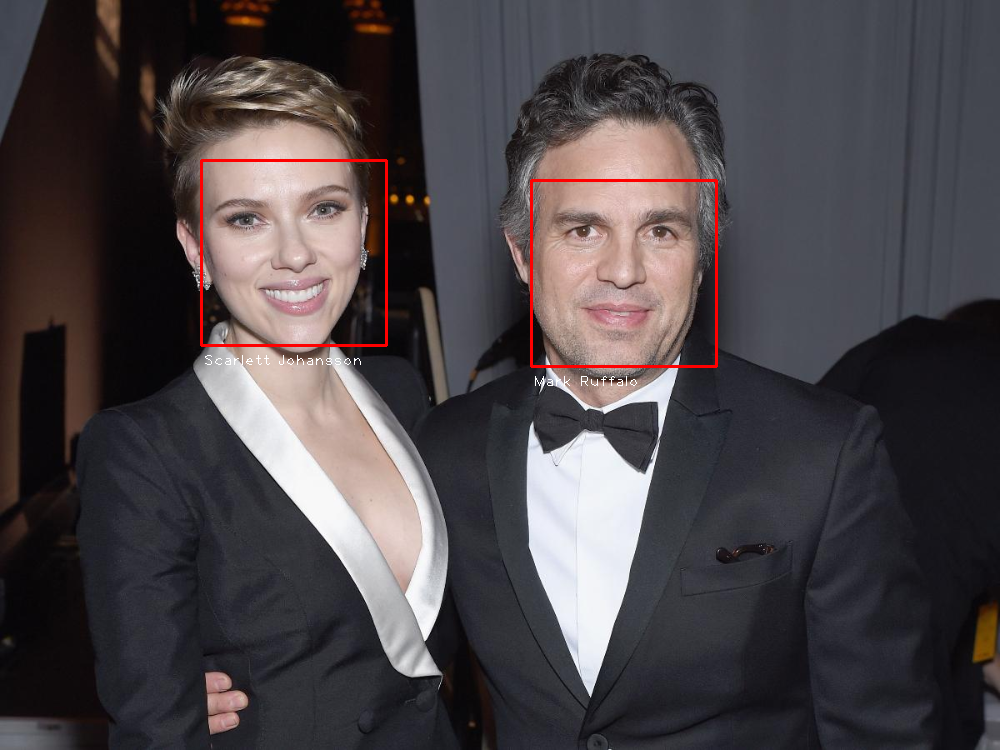

In [89]:
analiza_dir  = 'analiza'

# For petlja koristi za prolazak kroz direktorijum sa slikama potrebnih za analizu
for file in os.listdir(analiza_dir):
    print("Prepoznavanje na fotografiji: ", file)

    # Učitavanje slike iz napravljenog direktorijma
    unknown_image = read_img(analiza_dir + '/' + file)

    # Pronalaženje svih lica na slici
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    #Izlistavanje svakog lica na nepoznatoj slici
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):

        # Provjera da li je identifikovano lice neko od lica prepoznatih ranije
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

        # Ime se postavlja za nepoznato, u slučaju da algoritam ne prepozna identifikovanu osobu
        name = "Nepoznato"

        # Koristi se poznato lice sa najmanjom distancom od novog lica
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        # Crtanje kvadrata na licima uz ime i prezime identifikovanih osoba
        cv2.rectangle(unknown_image, (left, top), (right, bottom), (0, 0, 255), 2)
        cv2.putText(unknown_image, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)

    # Prikazivanje slike sa rezultatima
    cv2_imshow(unknown_image)


## **Evaluacija**

Treba istaći da su gore prikazani modeli pokrenuti na fotografijama prilagođenim za izvršavanje ovakvog zadatka - fotografije su skraćenje tako da prikazuju samo lice, na svakoj fotografiji lice gleda ili je okrenuto u smjeru kamere. Takođe, modeli su testirani na malom broju fotografija. Sve ovo su razlozi zbog kojih je teško uočiti bitne razlike između korišćenih modela. Međutim, tokom istraživanja oblasti za ovaj rad

Nedostaci **Haar cascade** modela su neprilagodljivost modela i nepreciznost. Pod neprilagodljivšću se podrazumijeva to da u okviru modela postoji jasno definisan način određivanja objekata na slikama. Slike se uvijek pretražuju sa unaprijed određenim veličinama prozora za pretraživanje te ako ne detektira objekat unutar takvog prozora, zato što nije u cjelosti uhvaćen ili vidljiv, neće ga prihvatiti. Takva lica bi ljudi mogli vrlo lako pronaći. Nepreciznost modela dolazi iz jasno definisanih karakteristika koja se pretražuju na slici. Postoji mogućnost da se pronađe objekat na slici koji ne predstavlja lice, ali zadovoljava definisane uslove. Ovo je mana koja se jako često pojavljuje. Jedna od prednosti klasičnog pristupa nad modernim se nalazi u procesu treniranja modela. Da bi trenirali jedan *Haar-cascade* model potrebno nam je znatno manje podataka nego za treniranje modela dubokog učenja. Uz manji skup podataka za treniranje smanjuje i vrijeme treniranja. Vrijeme za treniranje kod modela dubokog učenja može trajati nedeljama. Druga velika prednost je brzina modela tokom upotrebe, on vraća rezultate znatno brže nego moderni pristup te se može koristiti u stvarnom vremenu. Već je napomenuto da Haar-cascade predstavlja model za detekciju objekata, ali najbolje rezultate vraća pri detekciji objekata sa jasnim i istaknutim ivicama kao što recimo lice ima. Nije u stanju riješiti probleme šuma na slici i prekrivenosti lica te su ti nedostaci motivacija modernog pristupa detekcije lica.

**MTCNN model**, kao što je već rečeno, predstavlja primjer modernog pristupa detekcije objekata, odnosno lica. Cilj modela modernog pristupa je nadomjestiti nedostatke klasičnog pristupa, pa je zbog toga najveća prednost MTCNN modela preciznost i prilagodljivost. MTCNN je još uvijek među najpreciznijim modelima za detekciju objekata koji su dovoljno brzi za korišćenje u stvarnom vremenu. Moderni pristup zahtjeva znatno više računske snage u odnosu na klasični, što utiče na brzinu rada modela. MTCNN model obrađuje sliku u prosjeku oko 0.422s. To pri analizi jedne slike nije dugo vrijeme, međutim ako bismo koristili model na velikom skupu podataka i fotografija, vrijeme izvršavanja obrade bi bilo znatno duže nego vrijeme izvršavanja metodama klasičnog pristupa.


**HOG model** detekcije pruža dobre rezultati pri rješavanju problema detekcije lica, ali ga je potrebno trenirati na većem broju podataka da bi postigao jednaku tačnost kao i **Haar-cascade pristup**. Razlog tome je što su ljudska lica različita za svaku osobu u pogledu manjih karakteristika, zbog toga i informacije oko pojedinih piksela znatno variraju od osobe do osobe.

## **Reference**

> 1.   OpenCv dokumentacija: https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html
2. Detekcija lica uz OpenCV i mašinsko učenje: https://pyimagesearch.com/2018/02/26/face-detection-with-opencv-and-deep-learning/
3. Haar-cascade:
https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html
4.   Rad Haar-cascadea: https://www.youtube.com/watch?v=hPCTwxF0qf4&feature=emb_title
5.   Ubrzanje MTCNN modela: https://towardsdatascience.com/face-detection-usingmtcnn-a-guide-for-face-extraction-with-a-focus-on-speed-c6d59f82d49
6.   Face Recognition: https://pypi.org/project/face-recognition/
7.   Street-level surveillance, Face recognition: https://www.eff.org/pages/face-recognition
